# Logistic Regression (로지스틱 회귀) - 분류(Classification) 기법중 하나

## 1. 로지스틱 회귀분석의 이해

### 1) 사전 지식
  - logistic function (= sigmoid function)
  - $g(z) = \dfrac{1}{1 + e^{-z}}$

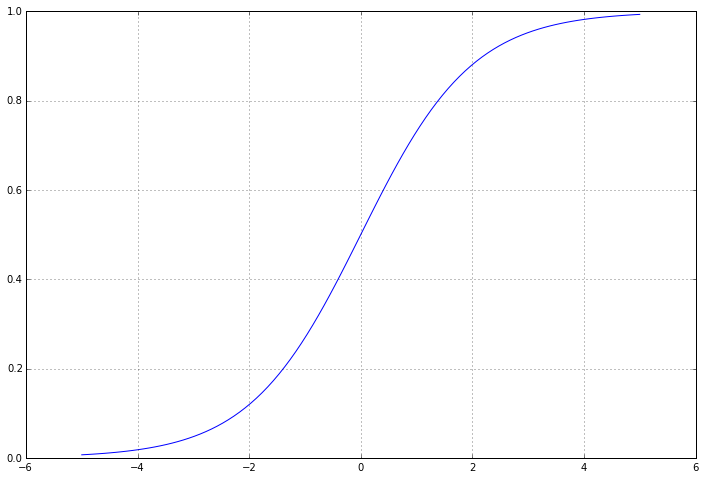

In [67]:
import math 
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

def logistic(x):
    return 1.0 / (1.0 + np.power(math.e, -1.0 * x))

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
ax1.grid(True)
xx = np.linspace(-5, 5, 100)
ax1.plot(xx,  logistic(xx))

  - 즉, logistic 함수에 입력으로 들어가는 $z$ 변수에 대해 다음과 같은 성질이 있다.
    - $g(z) >= 0.5$ if $z >= 0$ ($z$가 양수)
    - $g(z) < 0.5$ if $z < 0$ ($z$가 음수)  

### 2) 로지스틱 회귀분석을 이해하기 위한 예제 제시

- 예제 (Age and coronary heart disease (CHD))
![CHD Data](./figures/chd.png)

In [68]:
age = np.array([22, 23, 24, 27, 28, 30, 30, 32, 33, 35, 38, 40, 41, 46, 47, 48, 49,\
                49, 50, 51, 51, 52, 54, 55, 58, 60, 60, 62, 65, 67, 71, 77, 81])
chd = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])
df = pd.DataFrame({'age': age, 'chd': chd})
df

,age,chd
0,22,0
1,23,0
2,24,0
3,27,0
4,28,0
5,30,0
6,30,0
7,32,0
8,33,0
9,35,1


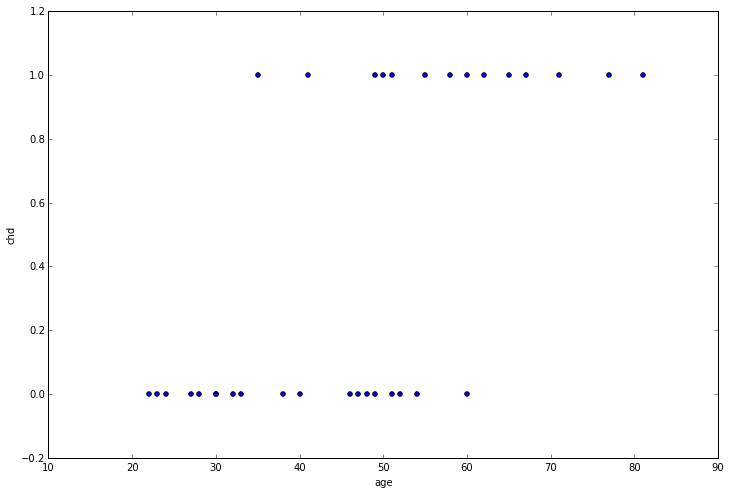

In [69]:
df.plot(kind='scatter', x='age', y='chd', figsize=(12, 8));

- 위 그림에서...
 - chd = 1은 심장병이 있다는 것이고 앞으로 y = 1 (양성 반응) 이라고 표기한다.
 - chd = 0은 심장병이 없다는 것이고 앞으로 y = 0 (음성 반응) 이라고 표기한다.

- 로지스틱 회귀 분석을 이해하기 위하여, 우선 위 데이터에 대하여 단순하게 ***회귀 분석 (Linear Regression)***을 수행하여 산출한 h 함수 (hyperthesis)를 plotting 

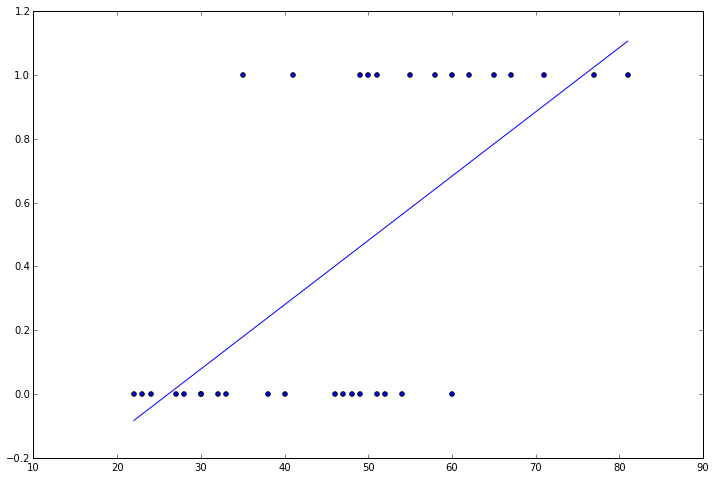

In [70]:
slope, intercept, r_value, p_value, std_err = stats.linregress(age, chd)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(age, chd)
xx = np.linspace(age.min(), age.max(), 2)
ax1.plot(xx, intercept + slope * xx)

- 복습: 회귀 분석 (Linear Regression) 모형
  - $n$개의 속성($n$개의 예측 변수)을 지닌 훈련 데이터 $n$-벡터 $X_i=\{x_{i1}, x_{i2}, ..., x_{in}\}$가 총 $m$ (즉, $1 \le i \le m$)개 주어지고,
  - 각 $X_i$ 벡터마다 연관된 실수 값 $y_i$ (결과 변수)이 주어질 때,
  - 임의의 $n$-벡터 $X =\{x_1, x_2,...,x_n\}$에 대해
  $$ $$ $$h_{\theta}(X) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$ $$$$
  - 위 식에서 $\theta=\{\theta_0, \theta_1, \theta_2, ..., \theta_n\}$는 계수 벡터(Coefficient Vector)라고 부른다. 
  - 위 모형을 좀 더 간단히 표현하면 아래와 같다.
    - 항상 $x_0 = 1$일 때, 임의의 $(n+1)$-벡터 $X =\{x_0, x_1, x_2,...,x_n\}$에 대해
    - $h_\theta(X) = \theta^T \cdot X$

### 3) 로지스틱 회귀 분석

- 로지스틱 회귀 분석 (Logistic Regression) 모형
  - ***logistic 함수와 기존 회귀 분석 모형을 합성한 함수 형태***
  - $n$개의 속성($n$개의 예측 변수)을 지닌 훈련 데이터 및 $x_{i0}=1$를 지닌 $(n+1)$-벡터 $X_i=\{x_{i0}, x_{i1}, x_{i2}, ..., x_{in}\}$가 총 $m$ (즉, $1 \le i \le m$)개 주어지고,
  - 각 $X_i$ 벡터마다 연관된 분류 표기 값 $y_i$ ($y_i \in \{0, 1\}$)이 주어질 때,
  - 임의의 $(n+1)$-벡터 $X =\{1, x_1, x_2,...,x_n\}$에 대해
$$ $$ $$h_\theta^L(X) = g(h_\theta(X))= \dfrac{1}{1 + e ^ {-h_\theta(X)}} = \dfrac{1}{1 + e ^ {-\theta^T \cdot X}}$$ $$$$
  - 위 식에서 $\theta=\{\theta_0, \theta_1, \theta_2, ..., \theta_n\}$

- ***로지스틱 회귀 분석 모형($h_\theta^L(X)$)의 해석***
  - 계수 백터  $\theta$를 구했다고 가정할 때, 임의의 입력 $X$에 대해 $y=1$ (분류 결과가 1)이 되는 추정 확률
  - 즉, $h_\theta^L(X) = P(y = 1 | X; \theta)$
  - $h_\theta^L(X) = 0.75$의 의미
    - 심장병 (chd)이 존재할 확률이 0.75이다.

- ***로지스틱 회귀 분석 모형($h_\theta^L(X)$)을 활용한 분류 결정 (Classification Decision)***
  - $h_\theta^L(X) = g(h_\theta(X)) >= 0.5$ if $h_\theta(X) =  \theta^T \cdot X >= 0$
    - 즉, $\theta^T \cdot X >= 0$이면 양성으로 분류하여 $y=1$로 분류한다.
  - $h_\theta^L(X) = g(h_\theta(X)) < 0.5$ if $h_\theta(X) =  \theta^T \cdot X < 0$
    - 즉, $\theta^T \cdot X < 0$이면 음성으로 분류하여 $y=0$로 분류한다.

- 로지스틱 회귀 분석에서 계수 벡터 $\theta$를 구하는 수학적 모델
  - 주어진 통계적 수치(훈련 데이터)들에 대해 다음 비용 함수 (Cost Function) $J^L(\theta)$를 구한다. 
  $$$$ $$
  \begin{align}
  J^L(\theta) &= \dfrac{1}{m} \sum_{i=1}^m \big| h_\theta^L(X_i) - y_i \big|^2 \\ 
              &= \dfrac{1}{m} \sum_{i=1}^m \big| \dfrac{1}{1 + e ^ {-h_\theta(X_i)}} - y_i \big|^2 \\
              &= \dfrac{1}{m} \sum_{i=1}^m Cost(h_\theta(X_i), y_i)
  \end{align}
  $$
  - 위 식에서 
    - $y_i \in \{0, 1\}$
    - $Cost(h_\theta(X_i), y_i) = \big| \dfrac{1}{1 + e ^ {-h_\theta(X_i)}} - y_i \big|^2$
  - 비용 함수 $J^L(\theta)$를 최소로 만드는 $\theta$ 벡터가 로지스틱 회귀 분석에서 찾으려고 하는 것임

- 비용 함수 $J^L(\theta)$를 최소로 만드는 $\theta$ 벡터를 구하는 방법
  - Gradient Descent
  - Stochastic Gradient Descent
  - [참고]: http://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect09.pdf

## 2. Univariate Logistic Regression (단일 변수 로지스틱 회귀분석)
### - sklearn 모듈 활용

In [94]:
from sklearn import linear_model
regr = linear_model.LogisticRegression()

age_ = []
for i in age:
    age_.append((i,))
regr = regr.fit(age_, chd)

print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [[ 0.03851967]]
Intercept: [-1.89317939]


In [95]:
def h_theta(x):
    return regr.intercept_[0] + regr.coef_[0][0] * x

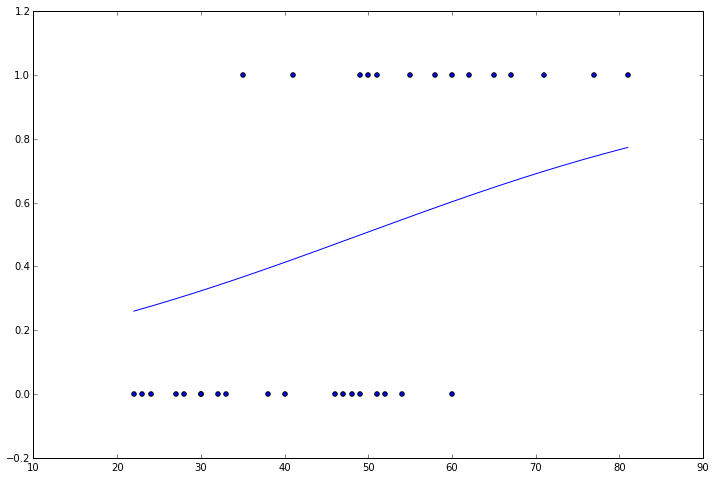

In [120]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(age, chd)
xx = np.linspace(age.min(), age.max(), 1000)
ax1.plot(xx, logistic(h_theta(xx)))

- $h_\theta^L(X) = P(y = 1 | x; \theta) = 0.5$인 데이터 x 찾기
  - 즉, $intercept + coef \times x = 0$인 데이터 x 찾기
  - $x = - \dfrac{intercept}{coef}$

In [119]:
print -1.0 * regr.intercept_[0] / regr.coef_[0][0]

49.1483851852


In [124]:
xx = np.linspace(age.min(), age.max(), 1000)
for x in xx:
    if abs(logistic(h_theta(x)) - 0.5000) < 0.0003:
        print x

49.1671671672


- 즉, 나이가 49.1 세부터는 심장병이 존재할 확률이 0.5 이상이며 "심장병 존재 가능자"로 분류할 수 있다.

## 2. Simple Linear Regression - II (실제 통계 데이터를 활용한 선형 회귀)

### 1) 데이터 설명
- URL
  - https://raw.githubusercontent.com/bluebibi/LINK_ML_BIG_DATA/master/death_rate.csv
- D: 사망률
- A1 ~ A15: 사망률에 영향이 있을 것 같은 각종 요인 데이터
- References
  - Richard Gunst and Robert Mason, Regression Analysis and Its Applications: a data-oriented approach, Dekker, 1980, pages 370-371
  - Gary McDonald and Richard Schwing, Instabilities of regression estimates relating air pollution to mortality, Technometrics, Volume 15, Number 3, pages 463-482, 1973.
  - Helmut Spaeth, Mathematical Algorithms for Linear Regression, Academic Press, 1991, ISBN 0-12-656460-4.
    
- The death rate is to be represented as a function of other variables.
- There are 60 rows of data. The data includes:
  - I: the index;
  - A1: the average annual precipitation (강수량);
  - A2: the average January temperature;
  - A3: the average July temperature;
  - A4: the size of the population older than 65;
  - A5: the number of members per household;
  - A6: the number of years of schooling for persons over 22;
  - A7: the number of households with fully equipped kitchens;
  - A8: the population per square mile; 
  - A9: the size of the nonwhite population;
  - A10: the number of office workers;
  - A11: the number of families with an income less than $3000;
  - A12: the hydrocarbon pollution index;
  - A13: the nitric oxide pollution index;
  - A14: the sulfur dioxide pollution index;
  - A15: the degree of atmospheric moisture.
  - D: the death rate.

### 2) Pandas를 활용한 데이터프레임 정의

In [96]:
import urllib2
import json

path = 'https://raw.githubusercontent.com/bluebibi/LINK_ML_BIG_DATA/master/death_rate.csv'
raw_csv = urllib2.urlopen(path)
df = pd.read_csv(raw_csv)

In [97]:
df

,I,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,D
0,1,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,0.921
1,2,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57,0.997
2,3,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,0.962
3,4,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,0.982
4,5,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1.071
5,6,53,45,80,7.7,3.45,10.2,66.8,3325,38.5,43.1,25.5,30,32,72,54,1.030
6,7,43,30,74,10.9,3.23,12.1,83.9,4679,3.5,49.2,11.3,21,32,62,56,0.934
7,8,45,30,73,9.3,3.29,10.6,86.0,2140,5.3,40.4,10.5,6,4,4,56,0.899
8,9,36,24,70,9.0,3.31,10.5,83.2,6582,8.1,42.5,12.6,18,12,37,61,1.001
9,10,36,27,72,9.5,3.36,10.7,79.3,4213,6.7,41.0,13.2,12,7,20,59,0.912


### 3) 회귀 분석을 위한 몇가지 요인 선택
- A1 (연강수량)
- A2 (1월 온도) 
- A3 (7월 온도)

In [98]:
df_sub = df[['A1','A2','A3', 'D']]

In [99]:
df_sub.head()

,A1,A2,A3,D
0,36,27,71,0.921
1,35,23,72,0.997
2,44,29,74,0.962
3,47,45,79,0.982
4,43,35,77,1.071


### 4) 통계 수치에 대한 Scatter Plot 생성

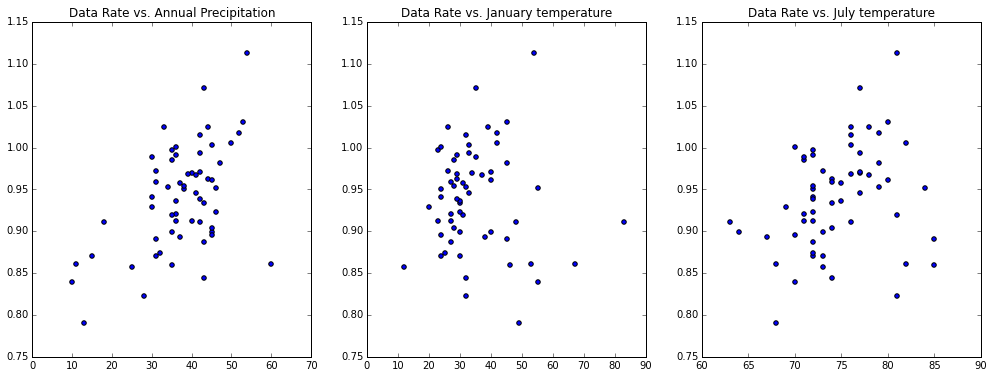

In [100]:
fig = plt.figure(figsize=(17, 6))
ax1 = fig.add_subplot(131)
ax1.scatter(df_sub['A1'], df_sub['D'])
ax1.set_title("Data Rate vs. Annual Precipitation")

ax2 = fig.add_subplot(132)
ax2.scatter(df_sub['A2'], df_sub['D'])
ax2.set_title("Data Rate vs. January temperature")

ax3 = fig.add_subplot(133)
ax3.scatter(df_sub['A3'], df_sub['D'])
ax3.set_title("Data Rate vs. July temperature")

### 5) scipy 모듈을 활용한 선형 회귀 분석

In [101]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sub['A1'].values, df_sub['D'].values)

In [102]:
format = "%40s: %12.10f"
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                                   slope: 0.0031827857
                               intercept: 0.8209365741
       r_value (Correlation Coefficient): 0.5105898154
r-squared (Coefficient of Determination): 0.2607019596
           p_value (Hyperthesis Testing): 0.0000307229
                std_err (Standard Error): 0.0007037705


- 모든 Predicator 변수들에 대한 분석

In [105]:
predicator_analysis = {}
for i in range(1, 16):
    predicator_analysis[i] = Series(np.empty(6), index=['slope', 'intercept', 'r_value', 'r_squared', 'p_value', 'std_err'])
    predicator_analysis[i][0],\
    predicator_analysis[i][1],\
    predicator_analysis[i][2],\
    predicator_analysis[i][4],\
    predicator_analysis[i][5] = stats.linregress(df['A' + str(i)].values, df['D'].values)
    predicator_analysis[i][3] = predicator_analysis[i][2] ** 2


format1 = "%3s %15s %15s %15s %15s %15s %15s"
format2 = "%3d %15f %15f %15f %15f %15f %15f"
print format1 % ('No.', 'slope', 'intercept', 'r_value', 'r_squared', 'p_value', 'std_err')
for i in range(1, 16):
    lst = [i]
    for j in range(6):
        lst.append(predicator_analysis[i][j])
    print format2 % tuple(lst)
    
df2 = pd.DataFrame(predicator_analysis)
print df2

No.           slope       intercept         r_value       r_squared         p_value         std_err
  1        0.003183        0.820937        0.510590        0.260702        0.000031        0.000704
  2       -0.000303        0.950407       -0.058248        0.003393        0.658436        0.000681
  3        0.003644        0.668059        0.279026        0.077856        0.030855        0.001647
  4       -0.007426        1.005207       -0.174749        0.030537        0.181736        0.005494
  5        0.165038        0.401320        0.358641        0.128623        0.004895        0.056404
  6       -0.037738        1.353973       -0.512525        0.262681        0.000028        0.008302
  7       -0.005178        1.358817       -0.427713        0.182938        0.000653        0.001437
  8        0.000011        0.896037        0.264186        0.069794        0.041378        0.000005
  9        0.004495        0.886501        0.644138        0.414914        0.000000        0.000701


### 6) 선형 회귀식 및 예측

 - 연간 강수량 (A1)과 사망률간의 관계: $y = 0.82 + 0.003 * x$ 
   - 강수량이 70일 때 사망률은? $0.82 + 0.003 * 70 = 1.03$

### 7) 선형 회귀식과 Scatter Plot을 함께 생성

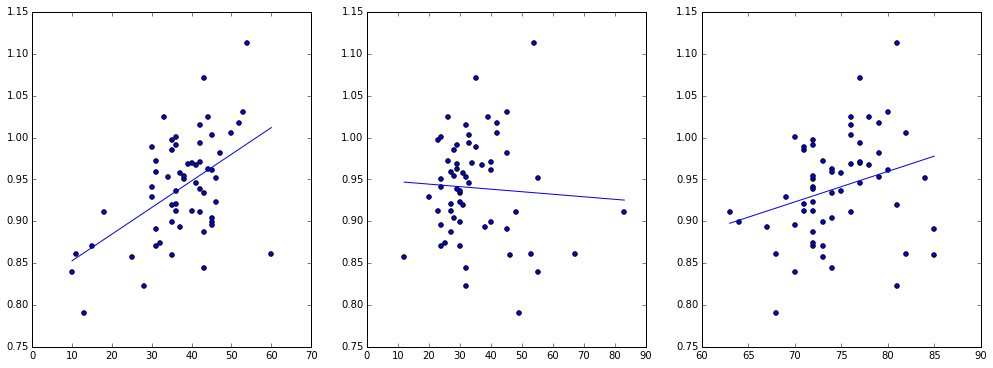

In [108]:
fig = plt.figure(figsize=(17, 6))
ax1 = fig.add_subplot(131)
ax1.scatter(df_sub['A1'], df_sub['D'])
line_plot_x1 = np.linspace(df_sub['A1'].min(), df_sub['A1'].max(), 10)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sub['A1'].values, df_sub['D'].values)
ax1.plot(line_plot_x1, intercept + slope * line_plot_x1)

ax2 = fig.add_subplot(132)
ax2.scatter(df_sub['A2'], df_sub['D'])
line_plot_x2 = np.linspace(df_sub['A2'].min(), df_sub['A2'].max(), 10)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sub['A2'].values, df_sub['D'].values)
ax2.plot(line_plot_x2, intercept + slope * line_plot_x2)

ax3 = fig.add_subplot(133)
ax3.scatter(df_sub['A3'], df_sub['D'])
line_plot_x3 = np.linspace(df_sub['A3'].min(), df_sub['A3'].max(), 10)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sub['A3'].values, df_sub['D'].values)
ax3.plot(line_plot_x3, intercept + slope * line_plot_x3)

## 3. Multivariate Linear Regression (다변수 선형 회귀) 
### - sklearn 모듈을 활용한 다중 변수 선형 회귀

In [109]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

### 1) A1과 A6에 대한 사망률 변화

In [110]:
df[['A1', 'A6']].head()

,A1,A6
0,36,11.4
1,35,11.0
2,44,9.8
3,47,11.1
4,43,9.6


In [112]:
X = zip(df['A1'], df['A6'])
print X

[(36, 11.4), (35, 11.0), (44, 9.8000000000000007), (47, 11.1), (43, 9.5999999999999996), (53, 10.199999999999999), (43, 12.1), (45, 10.6), (36, 10.5), (36, 10.699999999999999), (52, 9.5999999999999996), (33, 10.9), (40, 10.199999999999999), (35, 11.1), (37, 11.9), (35, 11.800000000000001), (36, 11.4), (15, 12.199999999999999), (31, 10.800000000000001), (30, 10.800000000000001), (31, 11.4), (31, 10.9), (42, 10.4), (43, 11.5), (46, 11.4), (39, 11.4), (35, 12.0), (43, 9.5), (11, 12.1), (30, 9.9000000000000004), (50, 10.4), (60, 11.5), (30, 11.1), (25, 12.1), (45, 10.1), (46, 11.300000000000001), (54, 9.6999999999999993), (42, 10.699999999999999), (42, 10.5), (36, 10.6), (37, 12.0), (42, 10.1), (41, 9.5999999999999996), (44, 11.0), (32, 11.1), (34, 9.6999999999999993), (10, 12.1), (18, 12.199999999999999), (13, 12.199999999999999), (35, 12.199999999999999), (45, 11.1), (38, 11.4), (31, 10.699999999999999), (40, 10.300000000000001), (41, 12.300000000000001), (28, 12.1), (45, 11.300000000000

In [113]:
regr.fit(X, y)

print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [ 0.0021277  -0.02541196]
Intercept: 1.13921548096


### 2) 선형 회귀식 및 예측

- 선형 회귀식: $y = 1.1392 + 0.0021 * A1 - 0.0254 * A6$ 

In [114]:
test_x = [36, 12]
print regr.predict(test_x)
print 1.1392 + 0.0021 * 36 - 0.0254 * 12

[ 0.9108692]
0.91


### 3) Scatter Plot 및 선형 회귀 Plane 생성

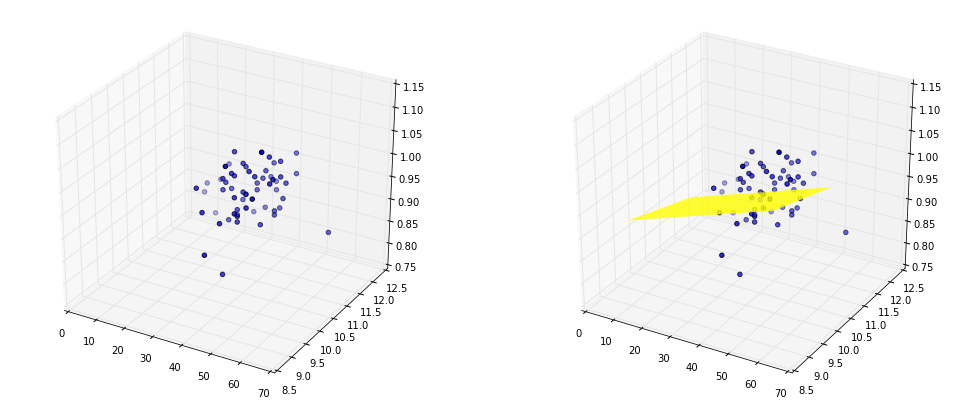

In [115]:
# Plot outputs
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(17, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df['A1'], df['A6'], df_sub['D'])

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df['A1'], df['A6'], df_sub['D'])
# create x,y
xx, yy = np.meshgrid(range(int(df['A1'].min()), int(df['A1'].max())), range(int(df['A6'].min()), int(df['A6'].max())))
# calculate corresponding z
z = 1.1392 + 0.0021 * xx - 0.0254 * yy
ax2.plot_surface(xx, yy, z, rstride=1, cstride=1, linewidth=0, color="yellow", shade=False)

## 4. Refererence

- http://scikit-learn.org/stable/modules/linear_model.html
- http://radimrehurek.com/data_science_python/
- http://nbviewer.ipython.org/github/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb